In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("Datasets/train_values.csv").set_index('building_id')

In [3]:
damages = pd.read_csv("Datasets/train_labels.csv").set_index('building_id')

# Whole dataset

In [4]:
df.shape

(260601, 38)

In [5]:
df.columns

Index(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
     

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0
has_superstructure_stone_flag,260601.0,0.034332,0.182081,0.0,0.0,0.0,0.0,1.0


# Damages

Let's begin with insights about the target

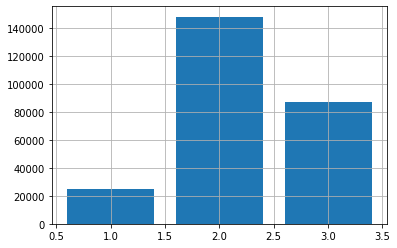

In [7]:
damages['damage_grade'].hist(align="mid", rwidth=0.8, 
                   bins=np.arange(1, 5)-0.5)

In [8]:
damages['damage_grade'].value_counts()/len(damages)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

In [9]:
damages['damage_grade'].mean()

2.2382723013342236

 # Geo Levels exploration


geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.

I will first take a look at the repartition of each geo level 1 ID in the dataset

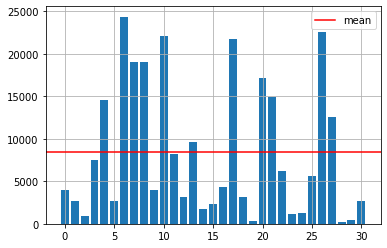

In [10]:
col = 'geo_level_1_id'
df.loc[:,col].hist(align="mid", rwidth=0.8, 
                   bins=np.arange(min(df.loc[:,col]), max(df.loc[:,col])+2)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

Geo leveld 1 ID are distributed unevenly in the dataset. It may be a problem later during learning step.

Let's now visualize the probabilities of damages level in each geo level 1 ID. The greener is a cell, the higher is the probability.

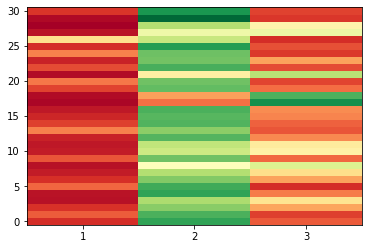

In [11]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(0,31), index=np.arange(1,4)).fillna(0)
for i in range(0,31):
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.yticks(ticks = np.arange(1,32,5)-0.5, labels=np.arange(0,31,5))
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.show()

In [12]:
cmap = cmap.sort_index(ascending=False)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
cmap

,1,2,3
30,0.093820,0.791884,0.114296
29,0.020202,0.881313,0.098485
28,0.000000,0.592453,0.407547
27,0.037105,0.479333,0.483562
26,0.354986,0.559142,0.085872
25,0.083215,0.779516,0.137269
24,0.206107,0.693130,0.100763
23,0.064228,0.685103,0.250669
22,0.129718,0.739603,0.130678
21,0.021627,0.393378,0.584996


The distribution of damages in the geo level 1 ID is quite homogeneous. However, some seem to be an asset (26, 24, 20, 13) and others seem to be a flaw (21, 18, 17).

The tab below give the mean of damages for each geo level 1 ID.

In [13]:
expected_value = pd.DataFrame(index=cmap.index, columns=["mean_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"mean_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="mean_damage")

,mean_damage,frequency
26,1.73089,8.678017
24,1.89466,0.502684
5,1.9197,1.032229
20,1.92646,6.606268
13,1.93766,3.686862
1,1.96076,1.036450
22,2.00096,2.399070
30,2.02048,1.030694
9,2.02602,1.518797
14,2.04959,0.657710


In [14]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,['geo_level_2_id','damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df['geo_level_2_id'].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs['geo_level_2_id'] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs['geo_level_2_id'] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
expected_value = pd.DataFrame(index=cmap.index, columns=["mean_damage", "frequency*100"])
for i in expected_value.index:
    expected_value.loc[i,"mean_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency*100"] = df['geo_level_2_id'].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="mean_damage")

,mean_damage,frequency*100
115,1,0.000384
1263,1,0.000384
688,1,0.000384
1043,1,0.000384
14,1.21818,0.042210
1228,1.22642,0.020338
557,1.23148,0.041443
428,1.25,0.003070
498,1.25,0.001535
301,1.25,0.001535


There are too many geo level2 ID. I will either drop this feature or substitute geo level 1&2 by the expected damage value of geo level 2.

# Count floors of buildings

count_floors_pre_eq (type: int): number of floors in the building before the earthquake.

In [15]:
col = 'count_floors_pre_eq'
df[col].describe()

count    260601.000000
mean          2.129723
std           0.727665
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

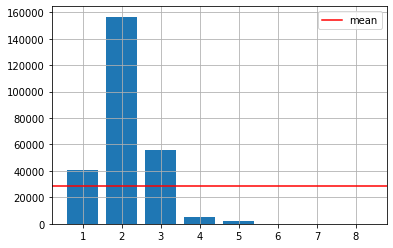

In [16]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), max(df[col])+1)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

In [17]:
df[col].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64

There are very few buildings with more than 6 floors : they are clearly outliers

Once again let's visualize the probabilities of damages level for each floor count. I added the probabilities of the wholedataset for comparison

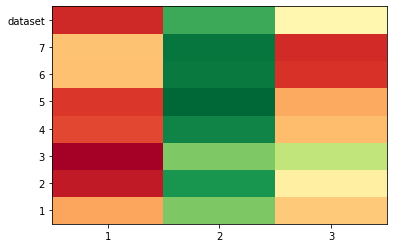

In [18]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(1,8), index=np.arange(1,4)).fillna(0)
for i in range(1,8):
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.yticks(ticks = np.arange(1,9,1)-0.5, labels=np.append(np.arange(1,8,1),"dataset"))
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.show()

In [19]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
7,0.256410,0.641026,0.102564
6,0.253589,0.636364,0.110048
5,0.113090,0.659394,0.227516
4,0.130347,0.622050,0.247603
3,0.045616,0.512056,0.442329
2,0.080403,0.599963,0.319634
1,0.221780,0.514280,0.263940


Let's plot the mean of damages level against count floors of building. I added the mean of the wholedataset for comparison.

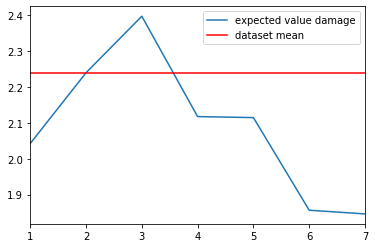

In [20]:
cmap = cmap.drop(index="dataset")
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.plot(y="expected_value_damage")
plt.axhline(damages['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

In [21]:
expected_value = expected_value.sort_index()
expected_value.loc["dataset","expected_value_damage"] = damages['damage_grade'].mean()
expected_value

,expected_value_damage,frequency
1,2.04216,15.518359
2,2.23923,60.100690
3,2.39671,21.341821
4,2.11726,2.081343
5,2.11443,0.861854
6,1.85646,0.080199
7,1.84615,0.014965
dataset,2.23827,NaN


There is no specific conclusion here : the floors count is not obviously related to the damage grade level

# Age of buildings

age (type: int): age of the building in years.

In [22]:
col = "age"
df[col].describe()

count    260601.000000
mean         26.535029
std          73.565937
min           0.000000
25%          10.000000
50%          15.000000
75%          30.000000
max         995.000000
Name: age, dtype: float64

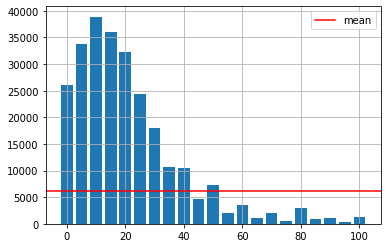

In [23]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 100+10, 5)-2.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

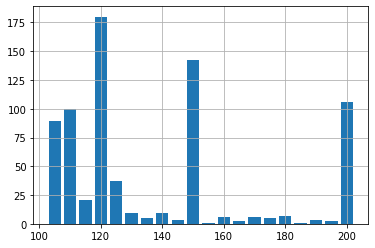

In [24]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(105, 200+10, 5)-2.5)

In [25]:
len(df[df[col] == 995])

1390

995-years old buildings are most likely errors. I will remove them from training set. There are very few buildings with aged more than 100 : they are clearly outliers.

Let's plot the mean of damages level against age of building. I added the mean of the wholedataset for comparison

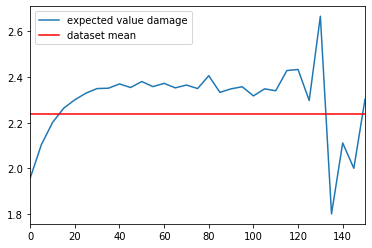

In [26]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.loc[:150,:].plot(y="expected_value_damage")
plt.axhline(damages['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

In [27]:
len(dmgs[dmgs[col]<105])/len(dmgs)

0.9918496091726432

In [28]:
dmgs[dmgs[col]>100]["damage_grade"].mean(), dmgs[dmgs[col]==100]["damage_grade"].mean()

(2.220809792843691, 2.317448680351906)

In [29]:
cmap.loc[105:,:].mean(), cmap.loc[100,:]

(1    0.021147
 2    0.668601
 3    0.310251
 dtype: float64, 1    0.007331
 2    0.667889
 3    0.324780
 Name: 100, dtype: float64)

This is an interesting curve. We can remove buildings aged more than 100 years from the training set (0.82% of buildings) and lower them to 100 years in the test set (because damages probabilities are really close so it won't affect predictions).

# Area percentage of buildings

In [30]:
col = 'area_percentage'
df[col].describe()

count    260601.000000
mean          8.018051
std           4.392231
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         100.000000
Name: area_percentage, dtype: float64

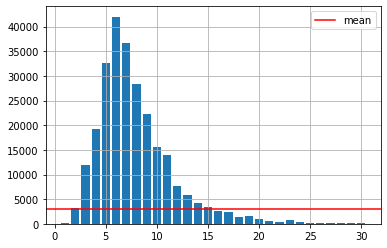

In [31]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 30+2)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

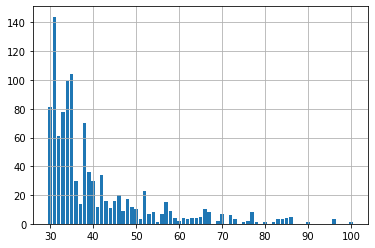

In [32]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(30, 100+2)-0.5)

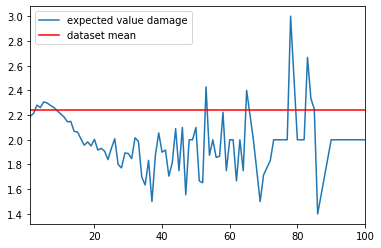

In [33]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.plot(y="expected_value_damage")
plt.axhline(damages['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

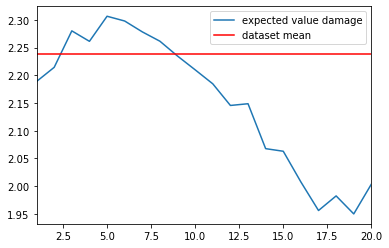

In [34]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.loc[:20,:].plot(y="expected_value_damage")
plt.axhline(damages['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

In [35]:
expected_value["frequency"][:20]

1      0.034536
2      1.220640
3      4.542193
4      7.381399
5     12.557128
6     16.121581
7     14.102785
8     10.915154
9      8.518386
10     5.991151
11     5.336511
12     2.909045
13     2.231381
14     1.597078
15     1.338828
16     0.999996
17     0.955100
18     0.505370
19     0.614733
20     0.404066
Name: frequency, dtype: float64

In [36]:
len(dmgs[dmgs[col]<17])/len(dmgs)

0.9579779049197816

In [37]:
dmgs[dmgs[col]>17]["damage_grade"].mean(), dmgs[dmgs[col]==17]["damage_grade"].mean()

(1.929567478137556, 1.9562073121735637)

In [38]:
cmap.loc[17:,:].mean(), cmap.loc[17,:]

(1    0.257166
 2    0.541736
 3    0.201098
 dtype: float64, 1    0.254319
 2    0.535155
 3    0.210526
 Name: 17, dtype: float64)

Damages probabilities are really close : it could be interesting to group together buildings with area percentage >= 17

# Height percentage 

In [39]:
col = "height_percentage"
df[col].describe()

count    260601.000000
mean          5.434365
std           1.918418
min           2.000000
25%           4.000000
50%           5.000000
75%           6.000000
max          32.000000
Name: height_percentage, dtype: float64

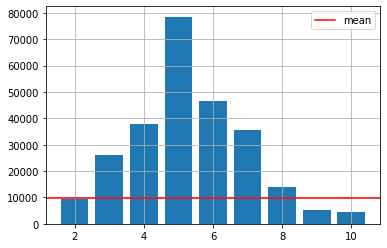

In [40]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 10+2)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

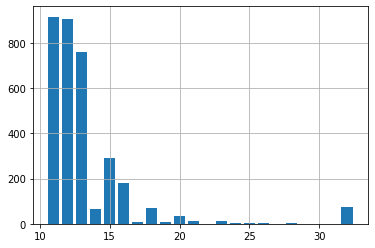

In [41]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(11, 32+2)-0.5)

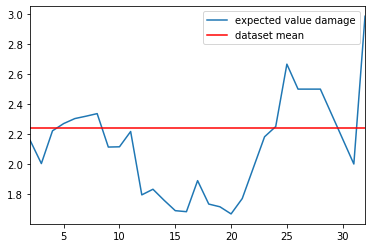

In [42]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.plot(y="expected_value_damage")
plt.axhline(damages['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

In [43]:
expected_value.loc["dataset","expected_value_damage"] = damages['damage_grade'].mean()
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
20,1.66667,0.012663
16,1.68156,0.068687
15,1.68836,0.112049
19,1.71429,0.002686
18,1.73239,0.027245
14,1.75758,0.025326
21,1.76923,0.004988
12,1.79383,0.348042
13,1.83136,0.291250
17,1.88889,0.003454


In [44]:
cmap.loc[:9,:]

,1,2,3
2,0.161419,0.520258,0.318323
3,0.235852,0.525330,0.238818
4,0.096708,0.584885,0.318407
5,0.067250,0.595481,0.337269
6,0.070336,0.555974,0.373690
7,0.063866,0.553081,0.383054
8,0.041289,0.580996,0.377715
9,0.157366,0.572173,0.270461


There is nothing interesting here : for well-represented values (from 2 to 8), damages probabilities are close to the dataset one's.

# Count families

count_families (type: int): number of families that live in the building.

In [45]:
col = "count_families"
df[col].describe()

count    260601.000000
mean          0.983949
std           0.418389
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: count_families, dtype: float64

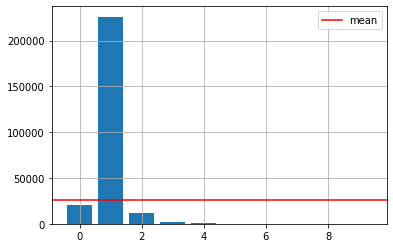

In [46]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 9+2)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

In [47]:
len(df[df[col] == 1])/len(df)

0.8676674302861462

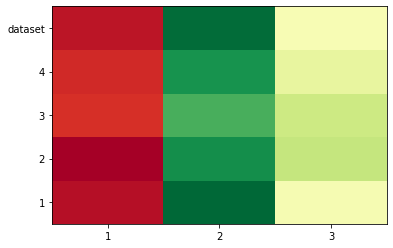

In [48]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.arange(1,5), index=np.arange(1,4)).fillna(0)
for i in range(1,5):
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.yticks(ticks = np.arange(1,6,1)-0.5, labels=np.append(np.arange(1,5,1),"dataset"))
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.show()

In [49]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
4,0.118252,0.526992,0.354756
3,0.122642,0.491676,0.385683
2,0.073402,0.533115,0.393483
1,0.089950,0.573695,0.336355


count_families == 1 is 87% of the dataset: this value is over-represented so this feature will not be very useful for training. I will consider remove it.

# Land surface condition

land_surface_condition (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.

In [50]:
col = "land_surface_condition"
df[col].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

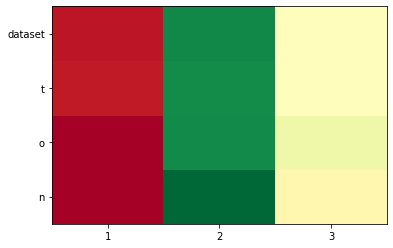

In [51]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,5)-0.5, labels=["n","o","t","dataset"])
plt.show()

In [52]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
t,0.101339,0.563151,0.335509
o,0.072391,0.566138,0.361472
n,0.071943,0.604706,0.323351


In [53]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
t,2.23417,83.175813
dataset,2.23827,NaN
n,2.25141,13.633102
o,2.28908,3.191085


One category (t) is over-represented in this feature. I will consider remove the feature, or merge together the 2 others (n and o)

# Foundation

foundation_type (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.

In [54]:
col = "foundation_type"
df[col].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

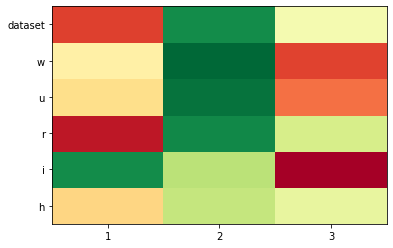

In [55]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,7)-0.5, labels=["h","i","r","u","w","dataset"])
plt.show()

In [56]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
w,0.287935,0.613176,0.098889
u,0.258696,0.598948,0.142356
r,0.048906,0.572615,0.378479
i,0.567539,0.411570,0.020890
h,0.247238,0.399862,0.352901


In [57]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
i,1.45335,4.059463
w,1.81095,5.801206
u,1.88366,5.471967
h,2.10566,0.555639
dataset,2.23827,NaN
r,2.32957,84.111726


Each category have very different damages probabilities so this feature will be very useful for training.

# Roof type

roof_type (type: categorical): type of roof used while building. Possible values: n, q, x.

In [58]:
col = "roof_type"
df[col].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

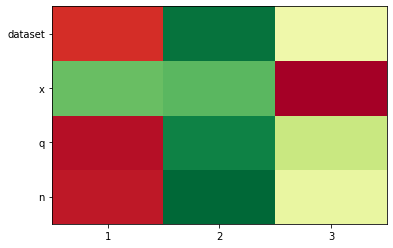

In [59]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,5)-0.5, labels=["n","q","x","dataset"])
plt.show()

In [60]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
x,0.472780,0.482173,0.045047
q,0.063759,0.552309,0.383932
n,0.074091,0.582180,0.343728


In [61]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
x,1.57227,6.209876
dataset,2.23827,NaN
n,2.26964,70.161665
q,2.32017,23.628459


Each category have very different damages probabilities so this feature will be very useful for training.

# Ground floor type

ground_floor_type (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.

In [62]:
col = "ground_floor_type"
df[col].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [63]:
df[col].value_counts() / len(df)

f    0.804368
x    0.095460
v    0.094370
z    0.003853
m    0.001949
Name: ground_floor_type, dtype: float64

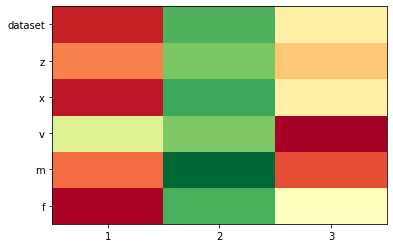

In [64]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,7)-0.5, labels=["f","m","v","x","z","dataset"])
plt.show()

In [65]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
z,0.198207,0.529880,0.271912
x,0.082486,0.584315,0.333199
v,0.419184,0.527427,0.053389
m,0.177165,0.675197,0.147638
f,0.059508,0.571880,0.368612


In [66]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
v,1.6342,9.437032
m,1.97047,0.194934
z,2.07371,0.385263
dataset,2.23827,NaN
x,2.25071,9.546011
f,2.3091,80.436760


There are too few buildings with ground_floor_type == m or z. I will merge tis 2 categories in preprocessing.

# Other floor type

other_floor_type (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.

In [67]:
col = "other_floor_type"
df[col].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

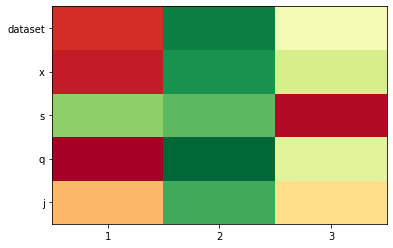

In [68]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,6)-0.5, labels=["j","q","s","x","dataset"])
plt.show()

In [69]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
x,0.078899,0.544858,0.376243
s,0.450865,0.490855,0.058281
q,0.044693,0.594862,0.360445
j,0.223025,0.511056,0.265919


In [70]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
s,1.60742,4.615485
j,2.04289,15.288890
dataset,2.23827,NaN
x,2.29734,16.672231
q,2.31575,63.423394


These categories are well balanced in numbers and have a diversity in damages level probabilities : they will be valuable for training.

# Position

position (type: categorical): position of the building. Possible values: j, o, s, t.

In [71]:
col = "position"
df[col].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

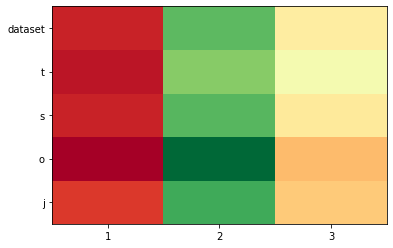

In [72]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,6)-0.5, labels=["j","o","s","t","dataset"])
plt.show()

In [73]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
t,0.080707,0.529187,0.390106
s,0.098308,0.574254,0.327438
o,0.051436,0.689670,0.258894
j,0.126111,0.594715,0.279175


In [74]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
j,2.15306,5.096680
o,2.20746,0.895238
s,2.22913,77.547669
dataset,2.23827,NaN
t,2.3094,16.460413


These categories are quite balanced in numbers and have a diversity in damages level probabilities : they will be valuable for training.

# Plan configuration 

plan_configuration (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.

In [75]:
col = "plan_configuration"
df[col].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

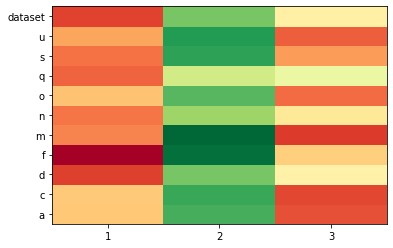

In [76]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,12)-0.5, labels=["a","c","d","f","m","n","o","q","s","u","dataset"])
plt.show()

In [77]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
u,0.212113,0.657440,0.130447
s,0.153179,0.644509,0.202312
q,0.137210,0.454146,0.408644
o,0.251572,0.603774,0.144654
n,0.157895,0.526316,0.315789
m,0.173913,0.739130,0.086957
f,0.000000,0.727273,0.272727
d,0.093213,0.569928,0.336859
c,0.264615,0.633846,0.101538


In [78]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
c,1.83692,0.124712
a,1.85317,0.096700
o,1.89308,0.061013
m,1.91304,0.017652
u,1.91833,1.400225
s,2.04913,0.132770
n,2.15789,0.014582
dataset,2.23827,NaN
d,2.24365,95.959724
q,2.27143,2.184182


These categories are to unevenly distributed. Considering that I will apply one-hot encoding to categorical features, this one will give 8 new features.. it may be a problem. I will probably replace each category by its mean and (nb(damages=1)+nb(damages=3)) / nb(damages=2)

# Legal ownership status

legal_ownership_status (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.

In [79]:
col = "legal_ownership_status"
df[col].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

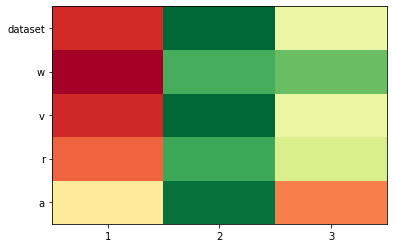

In [80]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,[col,'damage_grade']]
cmap = pd.DataFrame(columns=np.sort(df[col].unique()), index=np.arange(1,4)).fillna(0)
for i in cmap.columns:
    cmap[i] = dmgs[dmgs[col] == i]['damage_grade'].value_counts().sort_index()/len(dmgs[dmgs[col] == i])
cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = damages['damage_grade'].value_counts()/len(damages)
plt.pcolormesh(cmap, cmap="RdYlGn")
plt.xticks(ticks = np.arange(1,4)-0.5, labels=["1","2","3"])
plt.yticks(ticks = np.arange(1,6)-0.5, labels=["a","r","v","w","dataset"])
plt.show()

In [81]:
cmap.iloc[::-1]

,1,2,3
dataset,0.096408,0.568912,0.334680
w,0.048562,0.487112,0.464326
v,0.092732,0.570473,0.336795
r,0.144603,0.493551,0.361847
a,0.274129,0.557692,0.168179


In [82]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
a,1.89405,2.115111
r,2.21724,0.565232
dataset,2.23827,NaN
v,2.24406,96.292416
w,2.41576,1.027241


Because of its uneven distribution and its name, I assume that this feature is irrelevant and I will remove it.

# Superstructure

has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

has_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.

In [83]:
cols = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns

Let's first take a look at the expected value of damage for each superstructure. I will compute 4 values : 
- expected value of damage for buildings with this specific superstructure (expected_value_damage_1_all)
- expected value of damage for buildings with only this specific superstructure (expected_value_damage_1_exclusive)
- expected value of damage for buildings without this specific superstructure (expected_value_damage_0)
- frequency of buildings with this specific superstructure in the dataset (frequency_1_all)

In [84]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,cols.tolist() +['damage_grade']]
expected_value = pd.DataFrame(index=cols, columns=["expected_value_damage_1_all", "expected_value_damage_1_exclusive", 
                                                   "expected_value_damage_0", "frequency_1_all", "frequency_1_exclusive"])
for i in expected_value.index:
    expected_value.loc[i, "expected_value_damage_1_all"] = dmgs[dmgs[i] == 1]['damage_grade'].mean()
    s = dmgs[dmgs[i] == 1].drop(columns=["damage_grade"]).T.sum()
    index = s[s==1].index
    expected_value.loc[i, "expected_value_damage_1_exclusive"] = dmgs.loc[index,'damage_grade'].mean()
    expected_value.loc[i, "expected_value_damage_0"] = dmgs[dmgs[i] == 0]['damage_grade'].mean()
    expected_value.loc[i, "frequency_1_all"] = len(dmgs[dmgs[i] == 1])/len(dmgs)
    expected_value.loc[i, "frequency_1_exclusive"] = len(index)/len(dmgs)
expected_value

,expected_value_damage_1_all,expected_value_damage_1_exclusive,expected_value_damage_0,frequency_1_all,frequency_1_exclusive
has_superstructure_adobe_mud,2.34678,2.36174,2.22772,0.0886451,0.0277397
has_superstructure_mud_mortar_stone,2.3379,2.3749,1.91941,0.761935,0.526222
has_superstructure_stone_flag,2.45255,2.57329,2.23065,0.0343322,0.00471218
has_superstructure_cement_mortar_stone,1.96759,2.01246,2.2433,0.0182348,0.0036953
has_superstructure_mud_mortar_brick,2.27121,2.23812,2.23586,0.068154,0.0235763
has_superstructure_cement_mortar_brick,1.6933,1.62933,2.28263,0.0752683,0.0387796
has_superstructure_timber,2.16522,1.65248,2.26327,0.254988,0.0197428
has_superstructure_bamboo,2.11172,1.68465,2.25003,0.0850112,0.00369914
has_superstructure_rc_non_engineered,1.77953,1.47132,2.25868,0.04259,0.01599
has_superstructure_rc_engineered,1.37551,1.33423,2.25218,0.0158595,0.00995391


We can identify the most efficient superstructure : rc engineered and rc non engineered. They are slightly better when used alone.
On the other hand, buildings witn only stone flag (0.47% of dataset) are condemned to suffer significant damages.


I will now take a look at the number of superstructures per building and the associated expected value of damage grade.

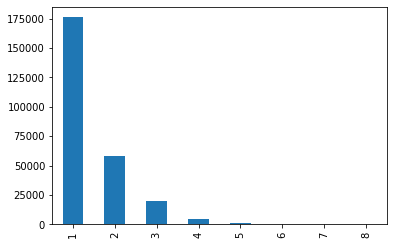

In [85]:
df[cols].T.sum().value_counts().plot.bar()

In [86]:
expected_value = pd.Series(index=np.arange(1,9))
for i in expected_value.index:
    s = df[cols].T.sum()
    index = s[s == i].index
    expected_value[i] = damages.loc[index,"damage_grade"].mean()
expected_value

1    2.263090
2    2.166638
3    2.201781
4    2.340305
5    2.251787
6    2.238854
7    2.028571
8    2.250000
dtype: float64

The number of superstructure have a little or no influence on damages.

# Secondary use

has_secondary_use (type: binary): flag variable that indicates if the building was used for any secondary purpose.

has_secondary_use_agriculture (type: binary): flag variable that indicates if the building was used for agricultural purposes.

has_secondary_use_hotel (type: binary): flag variable that indicates if the building was used as a hotel.

has_secondary_use_rental (type: binary): flag variable that indicates if the building was used for rental purposes.

has_secondary_use_institution (type: binary): flag variable that indicates if the building was used as a location of any institution.

has_secondary_use_school (type: binary): flag variable that indicates if the building was used as a school.

has_secondary_use_industry (type: binary): flag variable that indicates if the building was used for industrial purposes.

has_secondary_use_health_post (type: binary): flag variable that indicates if the building was used as a health post.

has_secondary_use_gov_office (type: binary): flag variable that indicates if the building was used fas a government office.

has_secondary_use_use_police (type: binary): flag variable that indicates if the building was used as a police station.

has_secondary_use_other (type: binary): flag variable that indicates if the building was secondarily used for other purposes.

In [87]:
cols = df.loc[:,'has_secondary_use':'has_secondary_use_other'].columns

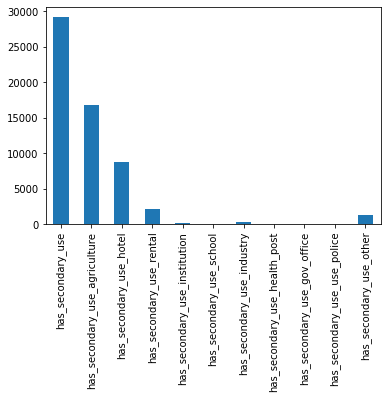

In [88]:
df[cols].sum().plot.bar()

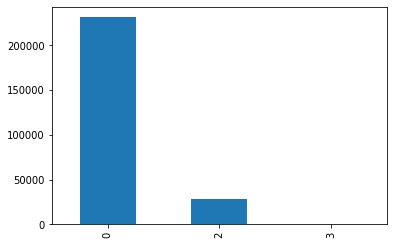

In [89]:
df[cols].T.sum().value_counts().plot.bar()

Buildings have either 0, 2 or 3 secondary use. At this point, I wonder if has_secondary_use is always associated with another secondary use feature and reciprocally.

In [90]:
df[df['has_secondary_use'] ==1][cols].T.sum().value_counts()

2    28599
3      557
dtype: int64

In [91]:
df[cols].T.sum().value_counts()

0    231445
2     28599
3       557
dtype: int64

So has_secondary_use can be remove because this feature can be obtained with the others

In [92]:
dmgs = df.merge(damages, right_index=True, left_index=True).loc[:,cols.tolist() +['damage_grade']]
expected_value = pd.DataFrame(index=cols, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i, "expected_value_damage"] = dmgs[dmgs[i] == 1]['damage_grade'].mean()
    expected_value.loc[i, "frequency"] = len(dmgs[dmgs[i] == 1])/len(dmgs) * 100
expected_value.sort_values(by="expected_value_damage")

,expected_value_damage,frequency
has_secondary_use_institution,1.66531,0.0940135
has_secondary_use_rental,1.67125,0.810051
has_secondary_use_gov_office,1.76316,0.0145817
has_secondary_use_health_post,1.85714,0.0188027
has_secondary_use_school,1.8617,0.0360705
has_secondary_use_hotel,1.91704,3.36261
has_secondary_use_industry,2.03226,0.10706
has_secondary_use_other,2.09895,0.511894
has_secondary_use,2.10101,11.188
has_secondary_use_use_police,2.13043,0.00882575


In preprocessing, I will merge together [has_secondary_use_institution and has_secondary_use_rental], [has_secondary_use_health_post and has_secondary_use_gov_school],  [has_secondary_use_hotel and has_secondary_use_industry and has_secondary_use_other]		